### Setting up

In [4]:
# Importing packages and data
import pandas as pd 

# Matplot and seaborn
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('dark')

# sklearn model packages 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# cross validation package
from sklearn.model_selection import cross_val_score

# Import Data
train = pd.read_csv('/Users/jusuki/Desktop/python projects/Kaggle submissions/kaggle_titanic/titanic_data/train.csv')
test = pd.read_csv('/Users/jusuki/Desktop/python projects/Kaggle submissions/kaggle_titanic/titanic_data/test.csv')
combine = [train, test]
        
print('Setup complete')

Setup complete


### visualizing existing data

#### See the percentages of survival, where 1 = survival. 38% survival rate

In [5]:
train['Survived'].value_counts(normalize = True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

#### Visualize gender ratios

In [6]:
train['Sex'].value_counts(normalize = True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

In [7]:
train[['Sex','Survived']].groupby(['Sex']).mean().sort_values(by='Survived')

,Survived
Sex,
male,0.188908
female,0.742038


###### * we see that there was a high level of females surviving even if they were less in number

#### Visualize Pclass (class of the passenger, 1-3, 1 being the highest)

In [8]:
# sorting the percentage within one feature:
train['Pclass'].value_counts(normalize=True)

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

In [9]:
# sorting the percentage within two features, with one of them being
# the percentage feature (ie. survival in this example)
train[['Pclass','Survived']].groupby(['Pclass']).mean().sort_values(by='Survived')

,Survived
Pclass,
3,0.242363
2,0.472826
1,0.629630


##### *we see inverse relationship between class population and class survival

In [10]:
# sorting the percentage within three+ features, with one of them
# being the percentage feature (ie. survival in this example)

train.groupby(['Pclass','Sex']).Survived.mean()

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

#### Visualize age data

Text(0.5, 0.98, 'Age distribution')

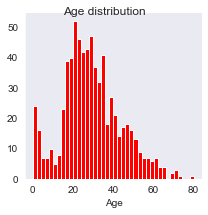

In [11]:
# First, general age distribution:
# f = sns.FacetGrid (file_name, plot frame column = x, row = y)

f = sns.FacetGrid(train)
f.map(plt.hist,'Age',bins= 40, color = 'red')
f.fig.suptitle("Age distribution")

Text(0.5, 0.98, 'dead vs. Survived distribution')

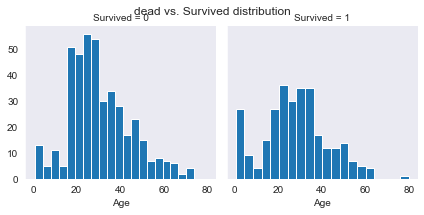

In [17]:
# since the ages are not categorized in raw data, it is more practical
# to plot it. Using sns.FacetGrid for making a histogram with two features
# age x survival
# simply make plt.hist for a continuous feature x categorical

g = sns.FacetGrid(train, col = 'Survived')
g.map(plt.hist, 'Age',bins= 20)
g.fig.suptitle("dead vs. Survived distribution")

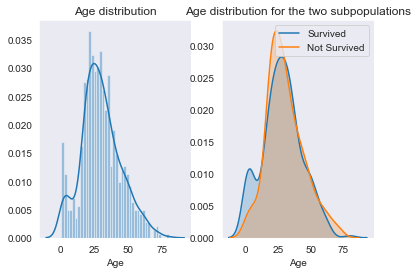

In [15]:
# call subplot function for two plots
fig, axes = plt.subplots(nrows= 1, ncols= 2)

# simple age distribution this time with guassian curve
axes[0].set_title('Age distribution')
f = sns.distplot(train['Age'], bins=40, ax=axes[0])

# imposing two datasets in one plot:
axes[1].set_title('Age distribution for the two subpopulations')
g = sns.kdeplot(train['Age'].loc[train['Survived'] == 1], 
                shade= True, ax=axes[1], label='Survived').set_xlabel('Age')
g = sns.kdeplot(train['Age'].loc[train['Survived'] == 0], 
                shade=True, ax=axes[1], label='Not Survived').set_xlabel('Age')


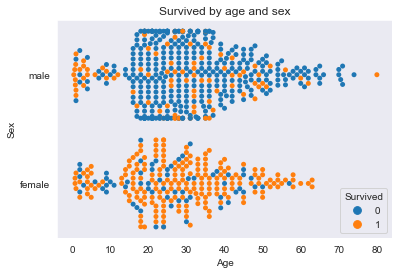

In [16]:
# for three features where one of them is not categorical (ie. age)
g = sns.swarmplot(y='Sex', x='Age', hue='Survived', data=train).set_title('Survived by age and sex')

#### Visualize fare data

In [ ]:
# simple fare distribution plot

fig, ax = plt.subplots()
f = sns.distplot(train.Fare).set_title('Fare distribution')

In [ ]:
fig, ax = plt.subplots()

#split the fares into 4 subsections, label accordingly
fare_ranges = pd.qcut(train.Fare, 4, labels = ['Low', 'Mid', 'High', 'Very high'])

# plot the fare_range and the survival rate
g = sns.barplot(x=fare_ranges, y=train.Survived).set_title('Survival rate by fare category')


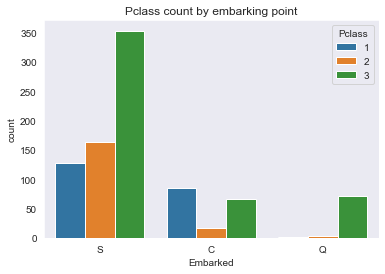

In [39]:
# for visualizing two features in which are both catgeorical and on the same axis
# use countplot, with x and hue
g = sns.countplot(data = train, x = 'Embarked', hue = 'Pclass').set_title('Pclass count by embarking point')


Text(0.5, 0.98, 'Pclass and age dist')

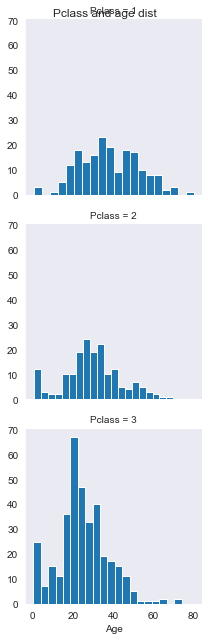

In [18]:
g = sns.FacetGrid(train, row = 'Pclass')
g.map(plt.hist, 'Age',bins= 20)
g.fig.suptitle("Pclass and age dist")

#### Visualizing the "name" feature

In [20]:
# splicing titles

train['Title'] = train['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
test['Title'] = test['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [21]:
train['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Jonkheer          1
Capt              1
the Countess      1
Mme               1
Ms                1
Sir               1
Lady              1
Don               1
Name: Title, dtype: int64

In [22]:
train['Title'].replace(['Mme', 'Ms', 'Lady', 'Mlle', 'the Countess', 'Dona'], 'Miss', inplace=True)

In [24]:
test['Title'].replace(['Mme', 'Ms', 'Lady', 'Mlle', 'the Countess', 'Dona'], 'Miss', inplace=True)

test['Title'].replace(['Major', 'Col', 'Capt', 'Don', 'Sir', 'Jonkheer'], 'Mr', inplace=True)
train['Title'].replace(['Major', 'Col', 'Capt', 'Don', 'Sir', 'Jonkheer'], 'Mr', inplace=True)

In [29]:
train.groupby('Title').Survived.mean()

Title
Dr        0.428571
Master    0.575000
Miss      0.707447
Mr        0.160000
Mrs       0.792000
Rev       0.000000
Name: Survived, dtype: float64

In [30]:
train['Sex'].replace(['female'],1,inplace=True)

In [31]:
test['Sex'].replace(['female'],1,inplace=True)
train['Sex'].replace(['male'],0,inplace=True)
test['Sex'].replace(['male'],0,inplace=True)

In [32]:
train.groupby('Title').Sex.mean()

Title
Dr        0.142857
Master    0.000000
Miss      1.000000
Mr        0.000000
Mrs       1.000000
Rev       0.000000
Name: Sex, dtype: float64

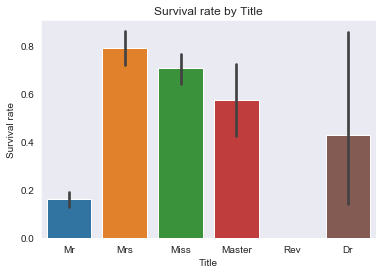

In [40]:
# for two features with x and y axis
plt.title('Survival rate by Title')
g = sns.barplot(x='Title', y='Survived', data=train).set_ylabel('Survival rate')

### Modeling prediction using the visualized features

In [41]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,Mr


In [42]:
feat = ['Pclass','Sex','Fare','Embarked','Title']

In [44]:
X = train[feat]

In [45]:
y = train['Survived']

In [46]:
X.head()

,Pclass,Sex,Fare,Embarked,Title
0,3,0,7.2500,S,Mr
1,1,1,71.2833,C,Mrs
2,3,1,7.9250,S,Miss
3,1,1,53.1000,S,Mrs
4,3,0,8.0500,S,Mr


In [49]:
numerical_cols = ['Fare']
categorical_cols = ['Pclass', 'Sex', 'Title', 'Embarked']

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='median')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Bundle preprocessing and modeling code 
titanic_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', RandomForestClassifier(random_state=0, 
                                                               n_estimators=500, max_depth=5))
                             ])

# Preprocessing of training data, fit model 
titanic_pipeline.fit(X,y)

print('Cross validation score: {:.3f}'.format(cross_val_score(titanic_pipeline, X, y, cv=10).mean()))

Cross validation score: 0.823


In [51]:
X_test = test[feat]


In [52]:
X_test.head()

,Pclass,Sex,Fare,Embarked,Title
0,3,0,7.8292,Q,Mr
1,3,1,7.0000,S,Mrs
2,2,0,9.6875,Q,Mr
3,3,0,8.6625,S,Mr
4,3,1,12.2875,S,Mrs


In [53]:
y_pred = titanic_pipeline.predict(X_test)

In [54]:
pd.DataFrame({'PassengerId':test.PassengerId,'Survived':y_pred}).set_index('PassengerId').to_csv('sub.csv')